<a href="https://colab.research.google.com/github/SerArtDev/redes-neuronales/blob/main/keras_avanzado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras avanzado
Keras contiene tres APIs:
- **Secuencial**: Permite crear modelos apilando capas una detrás de la otra de forma sencilla.
- **Funcional**: Da mayor flexibilidad y control sobre los modelos creados. Permite crear modelos más sofisticados que los de capas ordenadas linealmente.
- **Subclases**: Permite crear secciones de redes en clases, las cuales luego pueden ser unidas. Esto es útil para modelos con arquitectura dinámica, que necesita cambiar en el tiempo. También es útil para algunos modelos personalizados de aprendizaje reforzado. Esta API permite crear capas que no están disponibles en Keras, por lo cual es una buena herramienta de investigación.

La API funcional permite definir la capas primero y luego crear el modelo poniendo esas capas en el orden deseado, de esta manera se pueden reutilizar capas. Por tro lado, la API de subclases da control total, permitiendo incluso cambiar conexiones entre neuronas en el entrenamiento.


# Functional API
Vamos a hacer uso de la API funcional de Keras para crear un modelo sencillo

In [ ]:
import keras
from keras.layers import Input, Dense
from keras.models import Model

In [ ]:
# Para una capa de 20 entradas
input_layer = Input(shape=(20,))
# Definimos dos capas ocultas de 64 neuronas. Se pone la capa de la cual recibe
# sus conexiones. En este ejemplo, la capa hidden_layer1 recibe datos de
# input_layer y hidden_layer2 recibe de hidden_layer1.
hidden_layer1 = Dense(64, activation='relu')(input_layer)
hiden_layer2 = Dense(64, activation='relu')(hidden_layer1)
# Finalmente, se añade una capa de salida. Suponiendo un problema de
# clasificación binaria, se asigna una neurona de salida con función sigmoid
output_layer = Dense(1, activation='sigmoid')(hiden_layer2)
# Creamos el modelo especificando entradas y salidas
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Entrenamos el modelo con datos aleatorios
import numpy as np

x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))

model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5099 - loss: 0.6969
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5248 - loss: 0.6920 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5447 - loss: 0.6903 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5597 - loss: 0.6864
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5882 - loss: 0.6835
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5752 - loss: 0.6815
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5875 - loss: 0.6756 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5708 - loss: 0.6779 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5818 - loss: 0.6771 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6092 - loss: 0.6702 


In [ ]:
# Evaluamos el modelo
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

model.evaluate(x_test, y_test, batch_size=32)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5528 - loss: 0.6969  


[0.6907978057861328, 0.5799999833106995]

## Dropout y Batch Normalization

Estas son técnicas utilizadas para mejorar el rendimiento de la red.

 El dropout convierte aleatoriamente algunos valores de entrada en 0 durante el entrenamiento, reduciendo el overfitting. Esto obliga al modelo a no depender de una pocas neuronas y permite detectar otras características en los datos. Es un hiperparámetro que determina la fracción de neuronas que serán "apagadas" durante el entrenamiento.

Batch normalization es una técnica en la cual los datos de salida de la capa anterior son escalados y centrados lo cual estabiliza el proceso de entrenamiento. Esta técnica puede mejorar la convergencia del entrenamiento. Esta técnica es aplicada tanto en entrenamiento como en inferencia.


In [ ]:
# Vamos a generar una red aplicando dropout
from keras.layers import Dropout

input_layer = Input(shape=(20,))
hidden_layer1 = Dense(64, activation='relu')(input_layer)
dropout_layer = Dropout(rate=0.5)(hidden_layer1)
hidden_layer2 = Dense(64, activation='relu')(dropout_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Ejemplo de batch normalization
from keras.layers import BatchNormalization

input_layer = Input(shape=(20,))
hidden_layer1 = Dense(64, activation='relu')(input_layer)
batch_norm_layer = BatchNormalization()(hidden_layer1)
hidden_layer2 = Dense(64, activation='relu')(batch_norm_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,825 (22.75 KB)

 Trainable params: 5,697 (22.25 KB)

 Non-trainable params: 128 (512.00 B)

# Custom Layer

Se pueden crear capas personalizadas, lo cual nos permite tener control total de su comportamiento. Esto se logra definiendo una clase heredada de la clase Layer y sobreescribiendo tres métodos claves: init, build y call.


In [ ]:
from keras.layers import Layer
import tensorflow as tf

# Clase que hereda de Layer
class CustomLayer(Layer):

    def __init__(self, units=32, **kwargs):
      # En __init__ se inicializan los atributos de la capa
        self.units = units
        super(CustomLayer, self).__init__(**kwargs)

    def build(self, input_shape):
      # En build se inicializan los pesos de la capa. Este método se llama una
      # sola vez durante la primer llamada de la capa.
      self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='random_normal',
                               trainable=True)
      self.b = self.add_weight(shape=(self.units,),
                               initializer='zeros',
                               trainable=True)
      super(CustomLayer, self).build(input_shape)

    def call(self, inputs):
      # En call se define el comportamiento de la capa o la lógica del
      # forward.
      return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)



In [ ]:
# Esta capa puede ser usada en un modelo
input_layer = Input(shape=(20,))
custom_layer = CustomLayer(units=64)(input_layer)
output_layer = Dense(1, activation='sigmoid')(custom_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

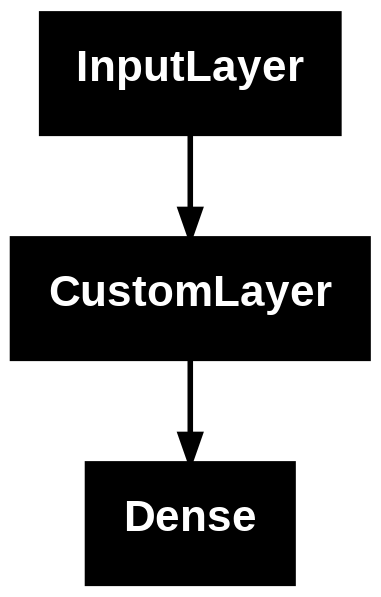

In [ ]:
# Mostrar diagrama del modelo
!pip install pydot graphviz
from tensorflow.keras.utils import plot_model

plot_model(model)

## Modelos Preentrenados

Keras trae consigo modelos ya entrenados para casos específicos los cuales se pueden utilizar. A estos modelos se les pueden añadir capas adicionales y congelar las capas del modelo preentrenado para evitar que ese entrenamiento se pierda, pero hacer que el modelo completo reconozca nuevas características en las nuevas capas añadidas.

Utilizar modelos preentrenados tiene varias ventajas:
 - Suelen ser entrenados con un buen conjunto de datos.
 - Reduce la necesidad de cómputo, al ya tener gran parte del entrenamiento hecha.
 - Reduce la cantidad de datos necesarios para entrenar el modelo.
 - Aunque el modelo no está entrenado para el caso en específico necesario, podría estar relacionado y aprender más rápido. Por ejemplo, es fácil aprender a tocar el órgano si ya se sabe tocar el piano.

Un ejemplo de modelo preentrenado es VGG16, entrenado con millones de imágenes del conjunto imagenet, capaz de reconocer bordes, texturas y formas, entre otras características generales.

In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Cargamos el modelo VGG16 entrenado con el conjunto de datos imagenet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Congelamos el modelo para que no se pueda entrenar
for layer in base_model.layers:
    layer.trainable = False
# Creamos y compilamos el modelo
model = Sequential(
    [
        base_model, # El modelo VGG16 entrenado previamente
        Flatten(),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Generamos imágenes de prueba
import os
from PIL import Image
import numpy as np

os.makedirs('sample_data/class_a', exist_ok=True)
os.makedirs('sample_data/class_b', exist_ok=True)
# Creamos 10 imágenes de cada clase, una blanca y otra negra
for i in range(10):
    image = Image.fromarray(np.ones((100, 100), dtype=np.uint8) * 255)
    image.save(f'sample_data/class_a/image_{i}.png')

    image = Image.fromarray(np.ones((100, 100), dtype=np.uint8) * 0)
    image.save(f'sample_data/class_b/image_{i}.png')
print('Imágenes creadas en sample_data')

Imágenes creadas en sample_data


In [5]:
# Cargar y preprocesar el conjunto de datos
# Estos generadores de datos se explican en keras_aumento_de_datos.ipynb
train_datagen = ImageDataGenerator(
    rescale=1./255,
)
train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
)

Found 20 images belonging to 2 classes.


In [6]:
# Entrenamiento del modelo
if train_generator.samples > 0:
  model.fit(train_generator, epochs=10)
#

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.7389
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.5000 - loss: 5.1229
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.5000 - loss: 1.2622
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.8128
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.5000 - loss: 0.9659
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.9872
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.5000 - loss: 0.9680
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.9220
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.5000 - loss: 0.8612
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.5000 - loss: 0.7954


## Fine-tune

Esta técnica consiste en utilizar un modelo preentrenado y descongelar las últimas capas para que estas puedan ser entrenadas, de tal forma que se modifica su aprendizaje.

In [7]:
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.5000 - loss: 0.7337
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 1.0000 - loss: 0.6385
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 1.0000 - loss: 0.3825
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 1.0000 - loss: 0.1463
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 16.9851
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 1.0000 - loss: 0.1799
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 2.7809
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 1.0831
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.5939
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.5964
